<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Your Name Here

***

This assignment is due on Moodle by **5pm on Friday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$0
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

***
__Part A Conclusions__:

To be a valid density function, the following equality must be true: $$\int_{-\infty}^\infty {cxe^{\left(-\frac{x^2}{10}\right)}dx} = 1$$

Because the function only has support on the interval $0\leq x < \infty$ the integral that we evaluate is $$\int_{0}^\infty {cxe^{\left(-\frac{x^2}{10}\right)}dx} = 1$$

We then evaluate this integral:

$$
    \lim_{t\rightarrow \infty} \int_{0}^t{cxe^{\left(-\frac{x^2}{10}\right)}dx} = 1 \\
    u = x^2\\
    \\
    du = 2xdx\\
    \frac{du}{2x} = dx\\
    \lim_{t\rightarrow \infty} \int_{0}^t{\frac{1}{2}ce^{\left(-\frac{u}{10}\right)}du} = 1 \\
    \lim_{t\rightarrow \infty}\left(\frac{1}{2}c \int_{0}^t{e^{\left(-\frac{u}{10}\right)}du}\right) = 1 \\
    \lim_{t\rightarrow \infty} \left(-5ce^{-\frac{u}{10}}\right)\Big|_{0}^{t^2} = 1 \\
    \lim_{t\rightarrow \infty} \left(-5ce^{-\frac{t^2}{10}} + 5ce^{-\frac{0}{10}}\right) = 1 \\
    \\
    \lim_{t\rightarrow \infty}\left(-5ce^{-\frac{t^2}{10}}\right) = 0\\
    5c = 1\\
    \therefore c = \frac{1}{5} \square
$$
***

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should be the limit of $F(x)$ as $x \rightarrow \infty$?  Be sure to **justify** these answers. Verify that $F(0)$ and $\displaystyle \lim_{x\rightarrow \infty} F(x)$ satisfy your hypotheses using cdf you derived.

***
__Part B Conclusions__:

To calculate (cdf) of a continuous distribution we find $F(z)$ which is defined in this case as the cumulative density function (used z instead of x so that it doesn't cause confusion with the way that the distribution is laid out in the problem statement)
$$
    F(x)=\int_{-\infty}^{x} {\frac{1}{5}xe^{\left(-\frac{x^2}{10}\right)}dx}\\
$$

Again, because there's only support on the interval $0 \leq x < \infty$ we modify $F(x)$

$$
    F(x)=\int_{0}^{x} {\frac{1}{5}xe^{\left(-\frac{x^2}{10}\right)}dx}\\
$$

Based on what we know about CDF and PDF, we expect 
$$F(0) = 0\\ $$  
We can determine this because there is only support starting at $x = 0$.  We also know that probability at any exact value is $0$. In the case of $F(0) = F(X \leq 0)$, the interval that is considered is when $x = 0$ exactly, which is $0$.

Because of the definition of a CDF, we expect
$$
    \lim_{x \to \infty} F(x) = 1
$$

Evaluating the previous integral, 
$$
    \int_{0}^{x} {\frac{1}{5}xe^{\left(-\frac{x^2}{10}\right)}dx} = 
    -e^{-\frac{x^2}{10}} + e^{-\frac{0}{10}} = 
    -e^{-\frac{x^2}{10}} + 1 =
    F(x) \\
    \\
$$

Confirming the hypotheses about $$\lim_{x \to \infty} F(x)\text{ and }F(0)$$

$$
    F(0) = -e^{-\frac{0^2}{10}} + 1 = -1 + 1 = 0 \square\\
    \text{and}\\
    \lim_{x \to \infty} -e^{-\frac{0^2}{10}} = 0\\
    \\
    \therefore \lim_{x \to \infty}F(x) = 1 \square
$$
***

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

***
__Part C Conclusions__:

Median is found at the point that separates the top half of the data vs. the bottom half. If we know the entire area under $F(x) = 1$, then we know that:

$\widetilde{x} = x \text{ when } F(x) = 0.5$

Using the answer that we found in Part B:
$$
    F(x) = -e^{-\frac{x^2}{10}} + 1\\
    0.5 = -e^{-\frac{x^2}{10}} + 1\\
    -0/5 = -e^{-\frac{x^2}{10}}\\
    0.5 = e^{-\frac{x^2}{10}}\\
    ln(0.5) = ln(e^{-\frac{x^2}{10}})\\
    ln(0.5) = -\frac{x^2}{10}\\
    -10*0.5 = x^2\\
    \sqrt{-10*0.5} = x\\
    \widetilde{x} \approx 2.633 \square \\
$$
***

**Part D**: It is a well-known fact that if there is a storm in your coastal city, if the flood level exceeds 6 feet, then the town will become inundated with octopuses in an event known localy as **Octogeddon**. Use the cdf you computed in **Part B** to find the probability that a given storm is an Octogeddon. 

***
__Part D Conclusions__:

Let event A be the chance that there is __OCTOGEDDON__

$$
    P(A) = P(X>6)\\
    \\
    P(X>6) = 1 - P(X \leq 6) = 1 - F(6)\\
    1 - F(6) = 1-\left(-e^{-\frac{6^2}{10}} + 1\right) \approx 0.0273 \approx P(A)\\
$$

There is about a 2.73% chance of __OCTOGEDDON__ with any given storm. $\square$
***

**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which are Octogeddons?

That is, what is $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$?

***
__Part E Conclusions__:

Let A be the event that there is are 3 storms in a year.

We can think of the number of storms occuring modeled by a Poisson distribution with $\lambda = 5$

So evaluating for $X~Pois(5)$ when $X = 3$... We want to find $f(3)$

$$
    P(A) = \frac{5^3}{3!}e^{-5} 
$$

Let B be the event there are 3 __OCTOGEDDON__s

This can be modeled by a binomial distribution with coeff $3 \choose 3$.

$$
    P(OCTOGEDDON) = p \approx 0.0273 \\ 
    P(\overline{OCTOGEDDON}) = 1 - p \approx 0.973\\
    bin(3, 3) = {3\choose3}(1-p)^3 \approx 0.920 = P(B \mid A)
$$

We assume that P(__OCTOGEDDON__) is P(__OCTOGEDDON__ | Storm) based on problem statement for part E, and interpolate to 3 OCTOGEDDONS and 3 storms

Finally:

$$
    P(A \cap B) = P(B \mid A)P(A)\\
    P(A \cap B) = 0.920*\frac{5^3}{3!}e^{-5} \square
$$

***

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

***
__Part A Conclusions__:

### John's Line:

Distribution: X~Pois(4)

Parameter: $\lambda = 4$

E[X] = 4 = $\lambda$

### Self Checkout:

__WORKING__:

Distribution: Y~Pois(5)

Parameter = $\lambda = 5$

E[X] = 5 = $\lambda$

__BROKEN__:

Distribution: Z~Pois(1)

Parameter = $\lambda = 1$

E[X] = 1 = $\lambda$
***

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

***
__Part B Conclusions__:

### John's Line:

$$
    f(X = 6) = \frac{4^6e^{-4}}{6!}
$$

### Self Checkout:

__WORKING__:

$$
    f(Y = 6) = \frac{5^6e^{-5}}{5!}
$$

__BROKEN__:

$$
    f(Z = 6) = \frac{1^6e^{-1}}{1!}
$$
***

**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

***
__Part C Conclusions__:

Let A be the event that self checkout is working.

Let S be the event that the self check-out tends 6 customers in 10 minutes.

$$
    P(A) = 0.9 \\
    1-P(A) = 0.1 = P(A^c) \\ 
    \text{and}\\
    P(S) = f(Y = 6)P(A) + f(Y=6)P(A^c)\\
    P(S) = \frac{5^6e^{-5}}{5!}*0.9 + \frac{1^6e^{-1}}{1!}*0.1 \square
$$
***

**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

***
__Part D Conclusions__:

$$
    \lambda = \frac{4 \text{ cust}}{10 \text{ min}}\times\frac{300 \text{ min}}{\text{shift}} = 120
$$

Let W~Pois(120) model the distribution of customers that come during his shift

$$
    CDF = \sum_{i = 0}^{x}{f(i)}\\
    \text{so for our distribution:}\\
    CDF = \sum_{i = 0}^{x}{\frac{\lambda^ie^{-\lambda}}{i!}} = \sum_{i = 0}^{x}{\frac{120^ie^{-120}}{i!}}\\\
$$

$$
    P(W \geq 100) = 1 - P(W < 100) = 1 - F(W = 99)=\\
    1-\sum_{i = 0}^{99}{\frac{120^ie^{-120}}{i!}}\square
$$

to find this __EXACT__ value we run in the python script below.
***

In [27]:
import math

def summation_with_func(low, high, func):
    sum = 0
    for i in range(low, high + 1):
        sum += func(i)
    return sum

def pois_pdf(x, lam = 120):
    return ((lam**x*math.exp(-lam))/(math.factorial(x)))

print(1 - summation_with_func(0, 99, pois_pdf))

0.9721362601094793


***
__FINAL ANSWER PART D__:

Based on the summation function above, which calculates the exact value of the equation listed in part D, we conclude that the probability that John Henry gets 100 customers through his line during his 5 hour shift is 96.53 percent.
***

**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [28]:
def checkout_count(time_len, rate_work, rate_broken = 0, p = 1):
    """
    Input: 
        time_len (int): the length of time that you want to simulate (in min)
        rate_work (int): is rate for when the machine is working (per min)
        rate_broken (int): is rate for when the machine is not working (per min)
        p (float): percenter that the machine is working properly
        
    Output:
        num_customers (int): the number of customers that get through the checkout line in the specified time_len
    """
    num_customers = 0
    #if the alloted time has not elapsed
    #this makes the assumption that the end of the shift is after the last customer is taken care of
    #even if the customer comes within a second of the time_len, they are taken care of
    while time_len > 0:
        time_til_customer = 0
        #if is broken use the rate_broken for the exponential
        if isBroken(1-p):
            time_til_customer = np.random.exponential(1/rate_broken)
        #else use lam broke
        else:
            time_til_customer = np.random.exponential(1/rate_work)
        time_len -= time_til_customer
        num_customers += 1
    
    return num_customers

def isBroken(p):
    return bool(np.random.binomial(1,p))

#test to confirm answer to part D
results = []
for i in range(5000):
    results.append(checkout_count(time_len = 300, rate_work = 0.4))
    
dfD = pd.DataFrame(results)
print(f"Part D confirmation: {dfD.apply(lambda val: (val >= 100)).sum()/len(dfD)}")

#part E simulation
results = []
for i in range(5000):
    results.append(checkout_count(time_len = 300, rate_work = 0.5, rate_broken = 0.1, p = 0.9))

dfE = pd.DataFrame(results)
print(f"Part E simulation results: {dfE.apply(lambda val: (val >= 100)).sum()/len(dfE)}")

Part D confirmation: 0    0.9784
dtype: float64
Part E simulation results: 0    0.722
dtype: float64


**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

Var of John Henry: 0    120.81714
dtype: float64
         Var of Checkout Machine: 0    260.534411
dtype: float64


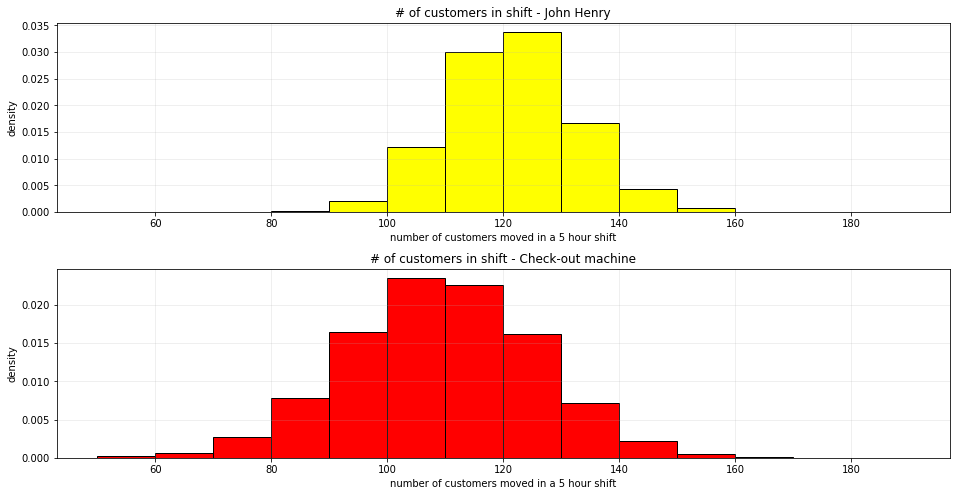

In [29]:
fig, ax = plt.subplots(2,1, figsize = (16,8))
bins = range(50, 200, 10)
dfD.hist(ax = ax[0],
         facecolor = "yellow",
        edgecolor = "black",
        bins = bins,
        density = True)

dfE.hist(ax = ax[1],
         facecolor = "red",
        edgecolor = "black",
        bins = bins,
        density = True)

for axis in ax:
    axis.grid(alpha = 0.25)
    axis.set_ylabel("density")
    axis.set_xlabel("number of customers moved in a 5 hour shift")

ax[0].set_title("# of customers in shift - John Henry")
ax[1].set_title("# of customers in shift - Check-out machine")
print(f"Var of John Henry: {dfD.var()}\n \
        Var of Checkout Machine: {dfE.var()}")

***
__Part E Conclusions__:

Based on the histograms above, if the comparison were 1:1 between one actual checkout person, and a checkout machine, the winner based on pure customer transactions is John Henry. He was able to move over 100 customers during his shift almost 98% of the time, whereas the checkout machine only could do the same metrics 73% of the time.  Also, the variance for the checkout machine was much higher showing that John has higher consistency when determining how many customers can be processed.

Based on cost however, and the ability to fit many checkout machines in one area, for the cost of one employee, who we will guess can oversee 6 checkout machines (PLACE SCANNED ITEM IN BAGGING AREA!........ ASSITANCE REQUESTED) vs. the cost of one employee running ONE checkout line, it is clear that more customers can be moved based on square foot if there are many checkout machines in the place of one or two lanes of personel manned lanes.

In my opinion I think that a mixture of both actual employees and some checkout machines is the choice for customer satisfaction and company profits.
***

### [20 points] Problem 3 - how to commit fraud
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$

People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

F(omega) = 0    1.0
dtype: float64


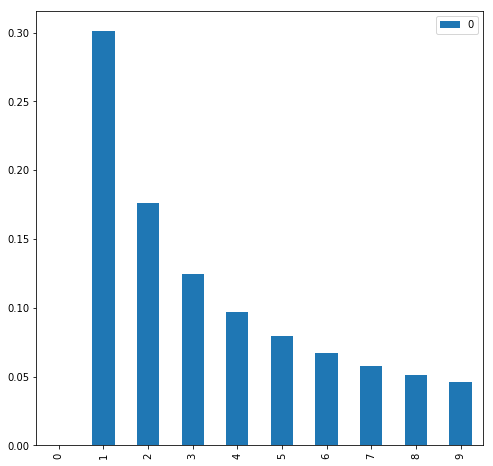

In [30]:
def pmf_natural(x):
    return math.log((x+1)/x, 10)

pmf = [0]
for i in range(1, 10):
    pmf.append(pmf_natural(i))
    
df = pd.DataFrame(pmf)
fig, ax = plt.subplots(1,1, figsize = (8,8))
df.plot.bar(ax = ax)
Pomega = df.sum()
print(f"F(omega) = {Pomega}")

***
__Part A Conclusions__:
To be a well defined PMF, two rules must be satisfied,

1.) $F(x) \geq 0 \in x = 1, 2, \dots, 9$
We can see that this is true from the bar plot above.

2.) $F(\Omega) = 1$
From the print statement, this is also true.

In terms of if I actually think this is a good estimate of accounting ledgers; I'm a statistician, not an accountant... Looks good to me!
***

**Part B**: Use the function you wrote above to make two bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. Please make one plot directly above the other. 

Text(0.5,1,'Naturally occuring - leading digit probability')

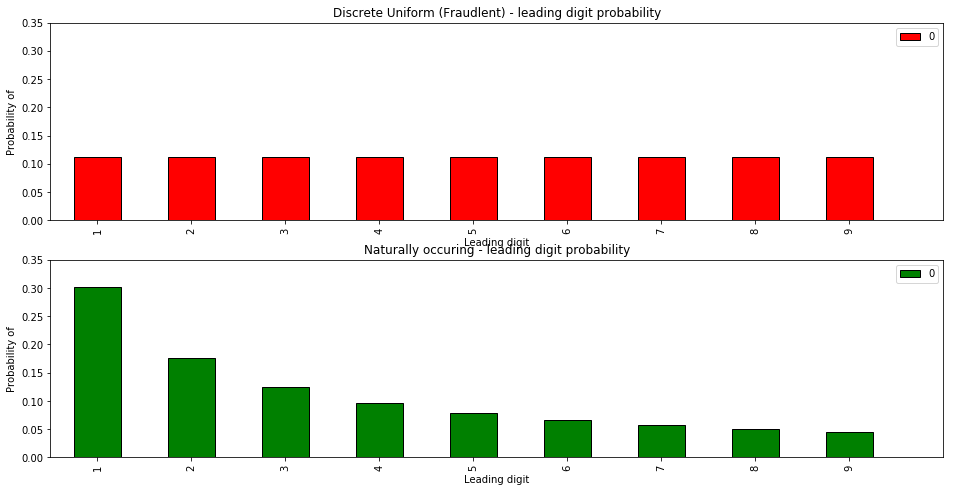

In [31]:
fraud_prob = [0]
for i in range(1, 10):
    fraud_prob.append(1/9)
fig, ax = plt.subplots(2,1,figsize=(16,8))
pd.DataFrame(fraud_prob).plot.bar(ax = ax[0],
                                 facecolor = "red",
                                 edgecolor = "black")
df.plot.bar(ax = ax[1],
           facecolor = "green",
           edgecolor = "black")

for axis in ax:
    axis.set_xlim(0.5, 10)
    axis.set_ylim(0,0.35)
    axis.set_xlabel("Leading digit")
    axis.set_ylabel("Probability of")
    
ax[0].set_title("Discrete Uniform (Fraudlent) - leading digit probability")
ax[1].set_title("Naturally occuring - leading digit probability")

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [32]:
def cdf_natural(y):
    sum = 0
    for i in range(1, y+1):
        sum += pmf_natural(i)
    return sum

***
__Part C Hand-work__:

Let A be event that leading digit is at most 4, that is $F(X = 4)$

Let B be event that leading digit is at most 5, that is $F(X = 5)$

$$
    CDF, F(x) = \sum_{i = 0}^{x}{\log_{10}\left( \frac{x+1}{x} \right)}
$$
***

In [33]:
print(f"At most 4: {cdf_natural(4)}\nAt most 5: {cdf_natural(5)}")

At most 4: 0.6989700043360187
At most 5: 0.7781512503836435


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

Text(0,0.5,'frequency')

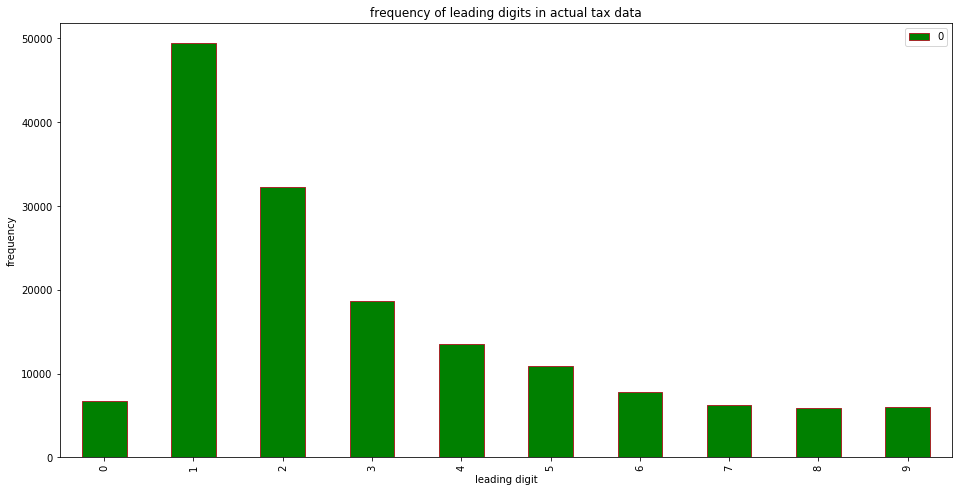

In [34]:
#clean the dataset
import re

#import all of the lines of the tax data file
#https://stackoverflow.com/questions/3277503/in-python-how-do-i-read-a-file-line-by-line-into-a-list
with open("tax_data.txt") as f:
    dirtytaxincomes = f.readlines()

#REFERENCES:
#https://stackoverflow.com/questions/29570771/re-sub-on-lists-python-3
#https://stackoverflow.com/questions/29403784/python-extract-pattern-from-string-using-regex
#get the numbers at the end of the line, which is the tax income
p = re.compile(r"[0-9]+$")
cleantaxincomes = [re.findall(p, income) for income in dirtytaxincomes]
#remove empties from the list of lists, 
#and turn the len 1 lists into straight up numbers
cleanertaxincomes = []
for l in cleantaxincomes:
    if l:
        cleanertaxincomes.append(l[0])
        
#REFERENCES:
#https://stackoverflow.com/questions/41271299/how-can-i-get-the-first-two-digits-of-a-number
#Get the first digit of each of the numbers
cleanesttaxincomes = [int(str(income)[0]) for income in cleanertaxincomes]
#finally we have the clean data that we need!

#REFERENCES:
#https://stackoverflow.com/questions/42315072/python-update-a-key-in-dict-if-it-doesnt-exist/42315099
#make a 
actual_probs = {}
for leading_digit in cleanesttaxincomes:
    if leading_digit not in actual_probs:
        actual_probs[leading_digit] = 1
    else:
        actual_probs[leading_digit] += 1

prob_list = [0] * 10
for key in actual_probs:
    prob_list[key] = actual_probs[key]

fig, ax = plt.subplots(1,1, figsize = (16, 8))
pd.DataFrame(prob_list).plot.bar(ax = ax,
                                facecolor = "green",
                                edgecolor = "brown")

ax.set_title("frequency of leading digits in actual tax data")
ax.set_xlabel("leading digit")
ax.set_ylabel("frequency")

***
__Part D Conclusions__:

The actual tax data looks much more closely like the REAL data than it does the fraud with similar shape.
***

### [20 points] Problem 4
***

Well. They're back at it. Tony and Dan are honing their lightsaber skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first professor to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Tony's and Dan's strengths, weaknesses, and handwriting, has revealed that Tony has an edge: the probability that Tony wins any one duel against Dan is given by $p=0.56$.

**Part A**: What is the probability that Tony wins the 9-duel series on the 8th duel? 

***
__Part A Work__:

This can be modeled with a negative binomial distribution, X~NB(5, 0.56).  r is 5 because that is the number of duels to be declared the winner, and p=0.56 because that is the probability of Tony winning an individual duel. We want to find f(k) where k = 8. The probability that Tony gets to 5 wins in 8 rounds

$$
    \text{for} X \text{~}NB(5, 0.56):\\
    f(k) = {k-1 \choose r-1}p^r(1-p)^{k-r}\\
    r = 5,  p = 0.56,  k = 8\\
    f(8) = {7 \choose 4}0.56^5(1-0.56)^3 \square
$$
***

**Part B**: What is the probability that Tony wins the 9-duel series in _any_ valid number of duels? 

***
__Part B Work__:

This can be modeled using the CDF of the PMF in Part __A__.

The valid number of duels for a win are $x \in 5, 6, 7, 8, 9$ which means that we want $F(k \leq 9) - F(k \leq 4)$.

Because there is no support for $k < 5$ (the duel must have at least 5 rounds for a winner to be declared!) we can consider $F(k \leq 4) = 0$, therefore we want to calculate

$$
    \sum_{k = 5}^{9}{{k-1 \choose 4}0.56^5(1-0.56)^{k-5}} \square
$$
***

**Part C**: The winner of the tournament will take home \$10,000 to use for a giant home aquarium for Stella the Octopus. Because the stakes are so high, Tony has decided to hire a famous Jedi consultant, Darth Ketelsen, to help him prepare for each duel. 

With Ketelsen's help, Tony's probability of winning any given match increases to $p = 0.7$. Ketelsen charges a fee of 90 per game, but as a testament to her confidence in her abilities, only charges Tony the \$90 for games that he wins and _only if Tony wins the whole tournament_.  So, if Tony competes in a 9-duel tournament and wins, he will take home 10,000 _minus_ 450 for Darth Ketelsen's fees, for a total payout of 9,550.  What is the expected payout for a 9-duel series?   

***
__Part C Work__:

p = 0.7
Expected Payout E[X] = (the prize for winning) * p(winning)
$$
    E[X] = \$9550 * \sum_{k = 5}^{9}{{k-1 \choose 4}0.7^5(1-0.7)^{k-5}} \square
$$
***

**Part D**: This year the Jedi Knight Lightsaber-on-Lightsaber Association (the JKLOL Assoc) is implementing an experimental rule: Since Tony is rumored to be the stronger duelist, he gets to _choose_ the length of the championship tournament! Specifically, he can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Tony continues to use the service of Darth Ketelsen, and considering the fact that Tony has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

***
__Part D Conclusions__:

The longer the tournament, the more of a guarentee Tony has of winning. We saw this in the stochastic simulations from the previous homework. As n increases, the value converges on the probability. In this case, the value will converge on Tony's probability of winning 0.7. This improves his expected payout, because he doesn't get paid if he doesn't win!

The problem with a longer game though is that Ketelsen takes a cut for each round that Tony wins, so more rounds total in the tournament means that the potential pay cut for his mentor has a chance of being higher, and the expected payout goes down.

There is an optimal length somewhere in between where the probability is higher of winning and he doesn't have to pay Ketelsen too much extra cash.
***

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Tony wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [35]:
from operator import mul
from fractions import Fraction

#https://stackoverflow.com/questions/3025162/statistics-combinations-in-python/3027128
def nCk(n,k): 
    return int( reduce(mul, (Fraction(n-i, i+1) for i in range(k)), 1) )

def negative_binomial_CDF(games_to_win, max_games, p_winning):
    a_sum = 0
    #calculate sum from games to win to max games
    for i in range(games_to_win, max_games + 1):
        a_sum += nCk(i - 1, games_to_win - 1) * (p_winning**games_to_win)*((1-p_winning)**(i-games_to_win))
    return a_sum

def optimal_series(p):
    expected_cash_dict = {}
    optimal_series_length = 1
    top_cash = 0
    for i in range(3, 100, 2):
        games_to_win = math.ceil(i / 2)
        cash_for_winning = 10000 - games_to_win * 90
        prob_for_winning = negative_binomial_CDF(games_to_win, i, p)
        expected_cash = cash_for_winning*prob_for_winning
        if expected_cash > top_cash:
            top_cash = expected_cash
            optimal_series_length = i
        expected_cash_dict[i] = expected_cash
    expected_list = [0] * 100
    for key in expected_cash_dict:
        expected_list[key] = expected_cash_dict[key]
    df = pd.DataFrame(expected_list)
    fig, ax = plt.subplots(1,1,figsize = (16, 8))
    df.plot.bar(ax = ax)
    ax.set_xticks(df.index)
    ax.set_title("Expected Payout for Number of Rounds")
    ax.set_xlabel("Round")
    ax.set_ylabel("Expected Payout")
    return optimal_series_length

# prob_list = [0] * 10
# for key in actual_probs:
#     prob_list[key] = actual_probs[key]
    
print(f"Optimal series to maximize expected payout: {optimal_series(0.7)} rounds total.")

NameError: name 'reduce' is not defined

***
__Part E Conclusions__:
We can see the expected payout peaks at a certain point, as we calculated at 17 rounds total.
***

### [20 points] Problem 5

Cement your superior stochastic simulation skills by solving some straightforward simulation scenarios.

**Part A**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either identical value or _adjacent_ value. You may let Aces be high or low, but not both.

In [82]:
from random import shuffle

def run_sim(x_sims, y_trials_each, sim_func):
    sims = []
    for _ in range(x_sims):
        sims.append(sim_func(y_trials_each))
    return sims

#https://stackoverflow.com/questions/41970795/what-is-the-best-way-to-create-a-deck-of-cards
class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit
        
    def mark_card(self):
        print("Nice try cheater!")
        
    def __str__(self):
        return f"Card({self.value}, {self.suit})"
    
    def __repr__(self):
        return f"Card({self.value}, {self.suit})"

#ACE - 1
#2 - 10 -yeeet
#JACK - 11
#QUEEN - 12
#KING - 13
class Deck:
    colors = ['heart', 'diamonds', 'spades', 'clubs']
    def __init__(self):
        self.cards = [Card(value, color) for value in range(1, 14) for color in colors]
        
    #https://stackoverflow.com/questions/976882/shuffling-a-list-of-objects
    def shuffle(self):
        shuffle(self.cards)
        
    def draw_card(self):
        drawn_card = self.cards[0]
        self.cards = self.cards[1:]
        return drawn_card
    
    #draws a hand of a certain amount of cards and sorts them
    def draw_hand(self, hand_size, sortby = "value"):
        hand = []
        for i in range(hand_size):
            hand.append(self.draw_card())
        #https://stackoverflow.com/questions/403421/how-to-sort-a-list-of-objects-based-on-an-attribute-of-the-objects
        return sorted(hand, key = lambda x: x.value)
    
    #draws a hand of a certain amount of cards and sorts them
    def draw_hand_first_card_too(self, hand_size, sortby = "value"):
        hand = []
        for i in range(hand_size):
            hand.append(self.draw_card())
        first_card = hand[0]
        #https://stackoverflow.com/questions/403421/how-to-sort-a-list-of-objects-based-on-an-attribute-of-the-objects
        return (sorted(hand, key = lambda x: x.value), first_card)
        
    def __repr__(self):
        return str(self.cards)

# d = Deck()
# d.shuffle()
# print(d)
# print(d.draw_card())
# print(d)

Estimated prob based on mean of all 10 simulations at 5000 trials each: 0.20457999999999998


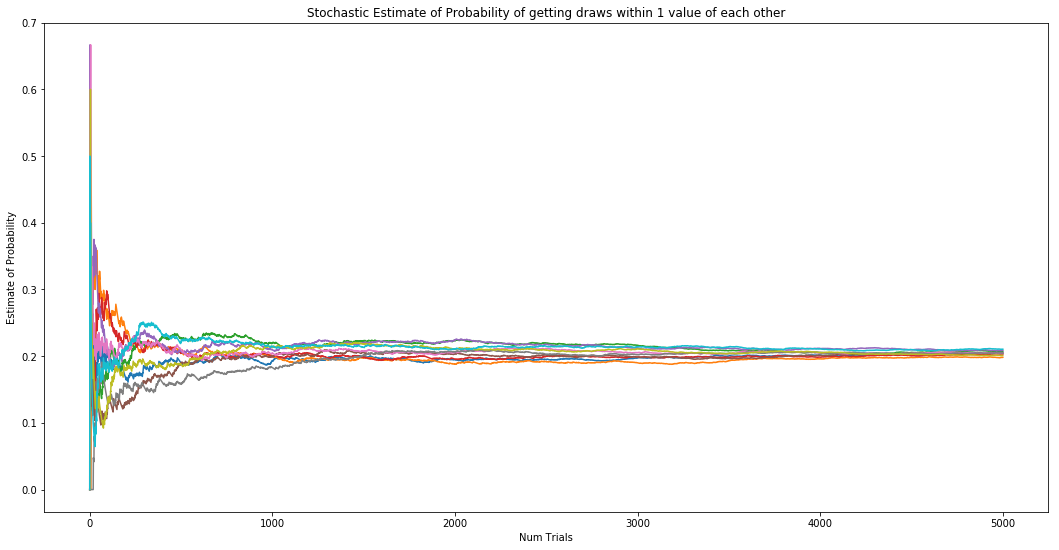

In [70]:
def sim_a(trials):
    trial_success_stoch = np.zeros(trials)
    trial_success_individual = np.zeros(trials)
    for i in range(trials):
        freshie = Deck()
        freshie.shuffle()
        card1 = freshie.draw_card()
        card2 = freshie.draw_card()
        if abs(card1.value - card2.value) <= 1:
            trial_success_individual[i] = 1
        trial_success_stoch[i] = np.sum(trial_success_individual[:i +1]) / (i + 1)
    return trial_success_stoch

fig2, ax2 = plt.subplots(1,1,figsize=(18, 9))
test_sims_1 = run_sim(10, 5000, sim_a)
for sim in test_sims_1:
    ax2.plot(sim)
ax2.set_xlabel("Num Trials")
ax2.set_ylabel("Estimate of Probability")
ax2.set_title("Stochastic Estimate of Probability of getting draws within 1 value of each other")
estimation_prob = sum([x[4999] for x in test_sims_1])/len(test_sims_1)
print(f"Estimated prob based on mean of all 10 simulations at 5000 trials each: {estimation_prob}")

**Part B**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

Estimated prob based on mean of all 10 simulations at 5000 trials each: 0.031779999999999996


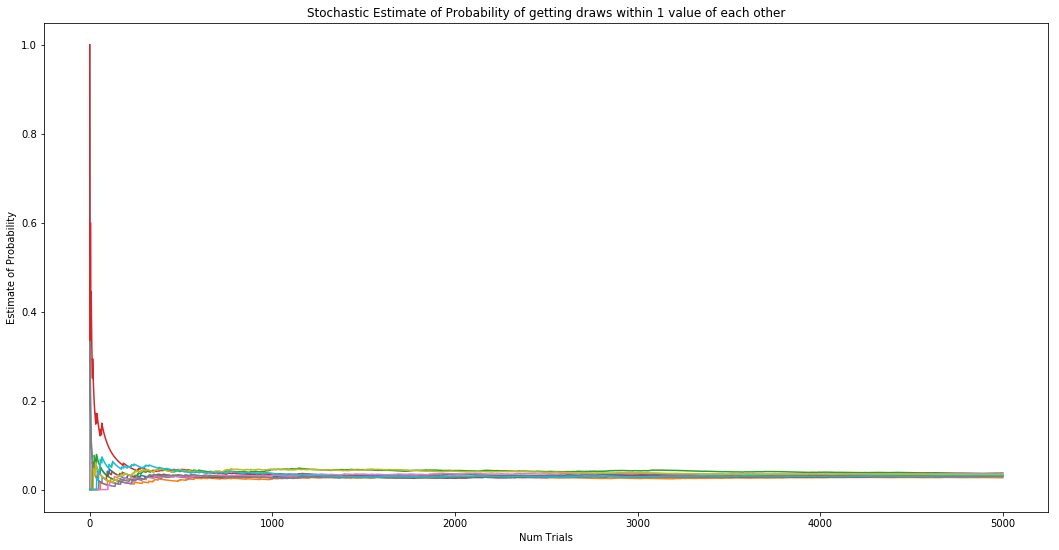

In [71]:
def sim_b(trials):
    trial_success_stoch = np.zeros(trials)
    trial_success_individual = np.zeros(trials)
    #combine into stochastic data
    for i in range(trials):
        freshie = Deck()
        freshie.shuffle()
        hand = freshie.draw_hand(3)
        if hand[2].value - hand[1].value == 1 and hand[1].value - hand[0].value == 1:
            trial_success_individual[i] = 1
        trial_success_stoch[i] = np.sum(trial_success_individual[:i +1]) / (i + 1)
    return trial_success_stoch

fig2, ax2 = plt.subplots(1,1,figsize=(18, 9))
test_sims_1 = run_sim(10, 5000, sim_b)
for sim in test_sims_1:
    ax2.plot(sim)
ax2.set_xlabel("Num Trials")
ax2.set_ylabel("Estimate of Probability")
ax2.set_title("Stochastic Estimate of Probability of drawing a run")
estimation_prob = sum([x[4999] for x in test_sims_1])/len(test_sims_1)
print(f"Estimated prob based on mean of all 10 simulations at 5000 trials each: {estimation_prob}")

**Part C**: When flipping over cards, sequentially, from a randomly shuffled deck, what is the probability that the third Ace will be revealed between flips 16 and 24, inclusively?

Estimated prob based on mean of all 10 simulations at 5000 trials each: 0.24333999999999997


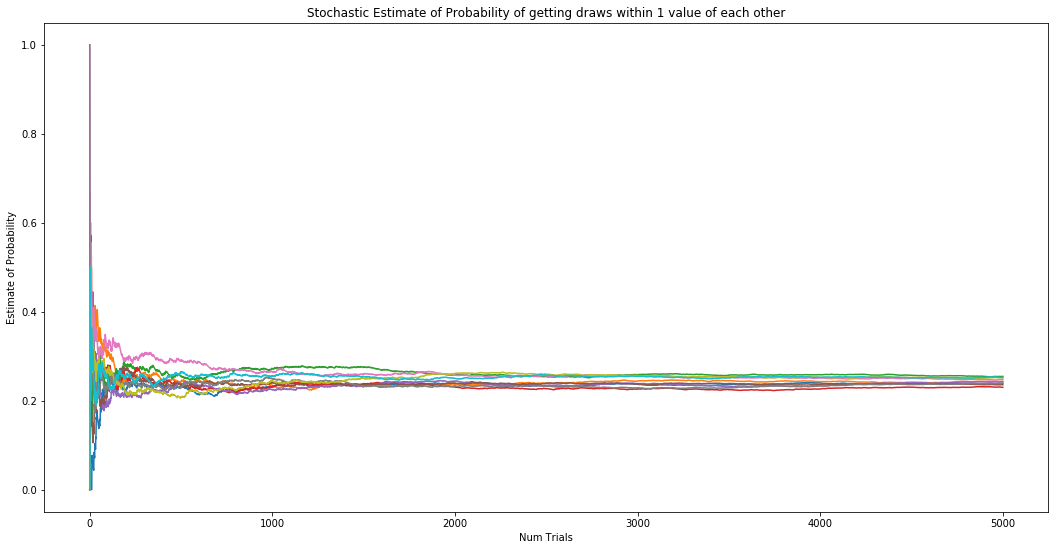

In [77]:
def sim_c(trials):
    trial_success_stoch = np.zeros(trials)
    trial_success_individual = np.zeros(trials)
    #combine into stochastic data
    for i in range(trials):
        freshie = Deck()
        freshie.shuffle()
        num_aces = 0
        for j in range(1, 25):
            card = freshie.draw_card()
            if card.value == 1:
                num_aces += 1
            if num_aces == 3 and j >= 16:
                trial_success_individual[i] = 1
                break
        trial_success_stoch[i] = np.sum(trial_success_individual[:i +1]) / (i + 1)
    return trial_success_stoch

fig2, ax2 = plt.subplots(1,1,figsize=(18, 9))
test_sims_1 = run_sim(10, 5000, sim_b)
for sim in test_sims_1:
    ax2.plot(sim)
ax2.set_xlabel("Num Trials")
ax2.set_ylabel("Estimate of Probability")
ax2.set_title("Stochastic Estimate of Probability of drawing Ace between 16 and 24th draw")
estimation_prob = sum([x[4999] for x in test_sims_1])/len(test_sims_1)
print(f"Estimated prob based on mean of all 10 simulations at 5000 trials each: {estimation_prob}")

**Part D**: Using a stochastic simulation, determine the probability mass function for: the probability that the first card drawn is an $X$, given that the card was part of a 3-card sequence (as in Part B). Express your PMF as a bar graph. Explain why it has the shape that it has.

[[0.         0.         0.         ... 0.02670437 0.02669598 0.0266876 ]
 [0.         0.         0.         ... 0.05592209 0.05590452 0.05588697]
 [0.         0.         0.         ... 0.0973924  0.09736181 0.09764521]
 ...
 [0.         0.         0.         ... 0.09016651 0.09013819 0.09010989]
 [0.         0.         0.33333333 ... 0.05623626 0.05621859 0.05620094]
 [0.         0.         0.         ... 0.02984606 0.02983668 0.02982732]]


Text(0.5,1,'Stochastic Estimate of Probability of a card being the first drawn (each color line is a different value of card)')

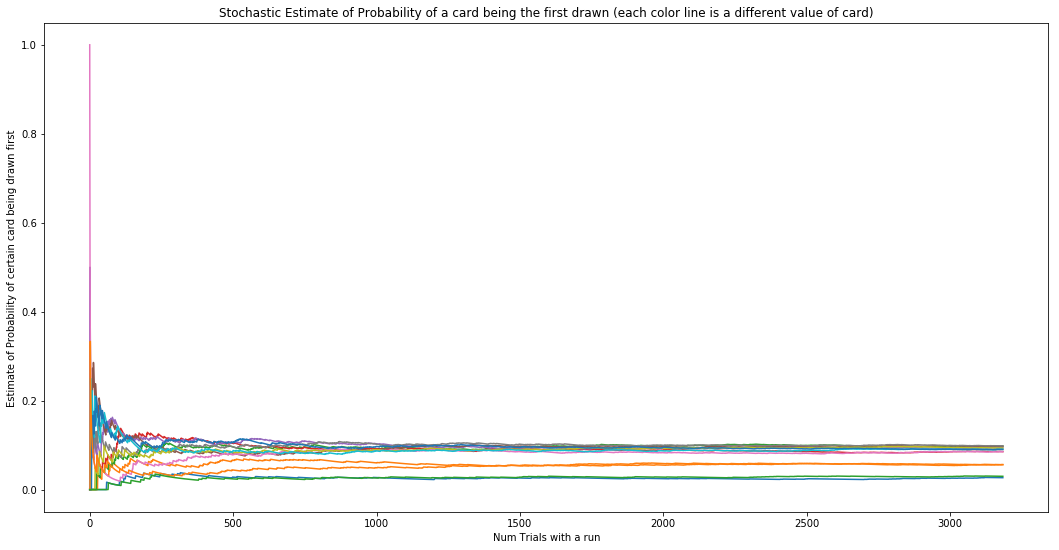

In [112]:
def sim_d(trials):

    trial_success_individual_values = []
    trial_success_rows = []
    #combine into stochastic data
    for i in range(trials):
        freshie = Deck()
        freshie.shuffle()
        (hand, first_card) = freshie.draw_hand_first_card_too(3)
        if hand[2].value - hand[1].value == 1 and hand[1].value - hand[0].value == 1:
#             print(f"hook line and sinker! first card was {first_card}, hand: {hand}")
            trial_success_individual_values.append(first_card.value)
            
    for val in trial_success_individual_values:
        new_row = [0] * 13
        new_row[val - 1] = 1
        trial_success_rows.append(new_row)
#         print(new_row)
    
    trial_success_rows_np = np.array(trial_success_rows)
    trial_success_stoch = np.zeros(shape = trial_success_rows_np.shape)
    for i in range(len(trial_success_rows)):
        trial_success_stoch[i] = np.sum(trial_success_rows_np[:i+1], axis = 0)/(i + 1)
        
#     for j in range(len(trial_success_individual_values)):
#         append a new row where everything is zero except for 
#         #new row with size 13
#         new_row = np.zeros(13)
        
#         trial_success_stoch.append() = np.sum(trial_success_individual[:i +1]) / (i + 1)
    return trial_success_stoch

fig2, ax2 = plt.subplots(1,1,figsize=(18, 9))
test_sims_1 = sim_d(100000)
print(test_sims_1.T)
for val in test_sims_1.T:
    ax2.plot(val)
ax2.set_xlabel("Num Trials with a run")
ax2.set_ylabel("Estimate of Probability of certain card being drawn first")
ax2.set_title("Stochastic Estimate of Probability of a card being the first drawn (each color line is a different value of card)")

***
__Part D Graph Explanation__:
Each line on the graph represents the probability of each value of card being drawn as the first card in a run.  As they approach 3000 runs, they start to level out.  The bar graph will tell us more...
***

Text(0,0.5,'probability')

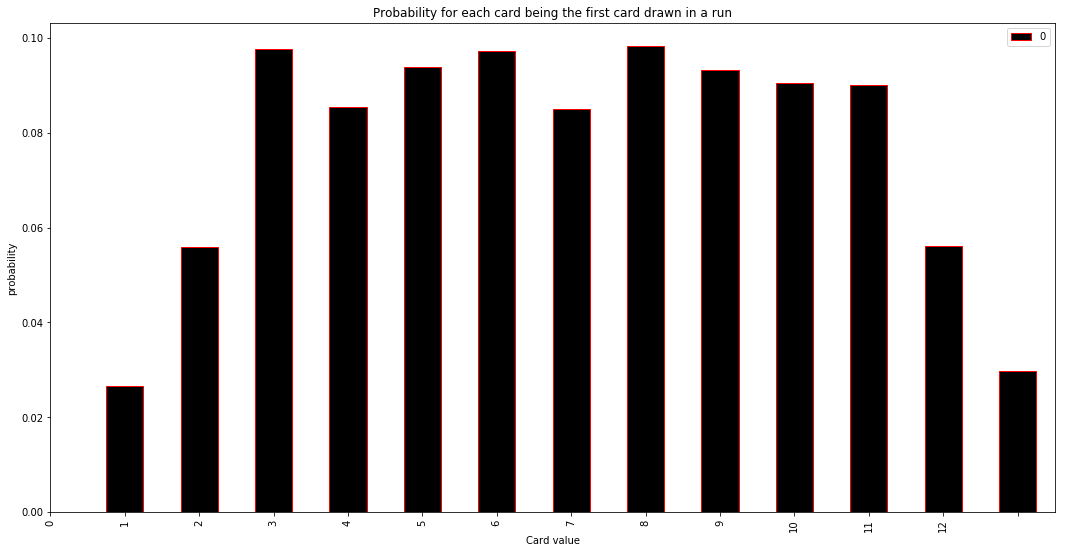

In [129]:
#build the bar graph
final_probs = []
for val in test_sims_1.T:
    final_probs.append(val[-1])
fig, ax = plt.subplots(1,1, figsize=(18, 9))
df = pd.DataFrame(final_probs)
df.plot.bar(ax = ax,
           facecolor = "black",
           edgecolor = "red")
ax.set_xticks([x - 1 for x in range(14)])
ax.set_title("Probability for each card being the first card drawn in a run")
ax.set_xlabel("Card value")
ax.set_ylabel("probability")

***
__Part E Final Conclusions__:

The bar graph above confirms what we know based on the stochastic simulation.  We can see that there are three-ish classes of cards in the final probability estimates. The bar graph shows a distinct difference in these classes of cards.

The three classes are "middle" cards which are from 3 to J

then there are "edge" cards which are A and K

then there are "demi-edge" cards, 2 and Q.

The highest probability are the middle cards because they have the highest chance of being included in a run.  They can be either the top, middle, or bottom card.

The next are the demi-edge cards, 2 and Q.  They can be included as either the middle, or one side of the run.

Then there are the edge cases, they can only be either the highest or lowest card of the run whether you have A or K.

Based on these possibilities we can see an estimation of the probabilities as they relate to each other.  The edge class of cards is 1/3, then 2/3 fr demi-edge, then 1 for the middle cards if we compare the middle tier as 1.

The reason why each "class" of card shares the same-ish probability is that the draw is independent and completely random. There is not a higher chance of any card being drawn first, the only thing that changes is the possibility of that card being included in a run which is reflected here.

***